In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#load the data
df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [4]:
#check the data types
df.dtypes

0    float64
1    float64
dtype: object

In [5]:
#check the missing values

df.isnull().sum()

0    0
1    0
dtype: int64

In [7]:
df.describe()


,0,1
count,250.000000,250.000000
mean,0.126630,2.957091
std,2.704501,2.463476
min,-5.888766,-5.409809
25%,-2.067694,1.394351
50%,0.413196,2.810804
75%,1.705562,4.977583
max,9.399157,9.548513


In [10]:
df.nunique()

## it seems that there are some columns with only one unique value which is not useful for the model


0    250
1    250
dtype: int64

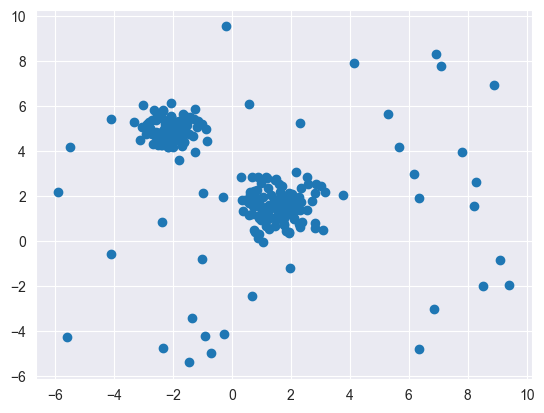

In [11]:
##Scatter plot

plt.scatter(df.iloc[:,0],df.iloc[:,1])

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

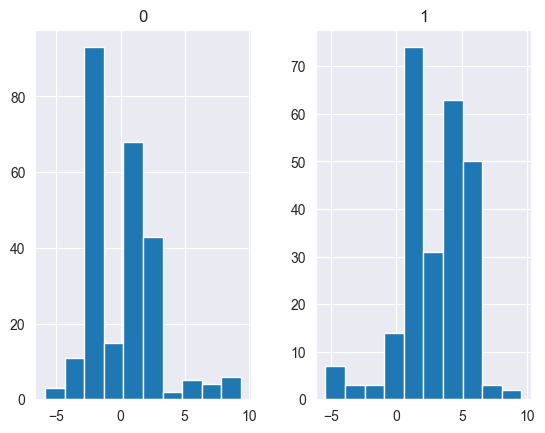

In [12]:
##Histogram
df.hist()


<Axes: >

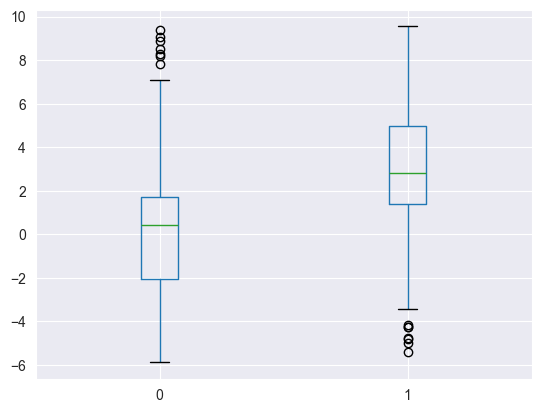

In [13]:
##Boxplot
df.boxplot()

In [14]:
##Correlation matrix
df.corr()

,0,1
0,1.000000,-0.396682
1,-0.396682,1.000000


In [15]:
##Heatmap

<Axes: >

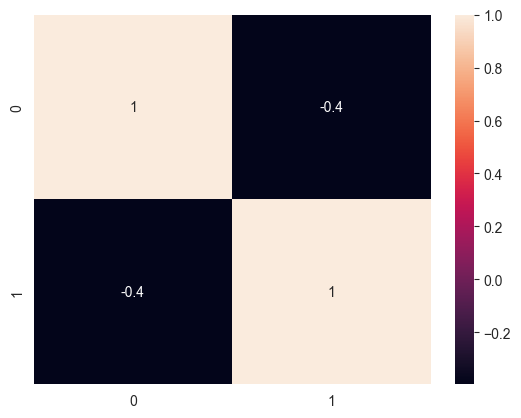

In [16]:
sns.heatmap(df.corr(),annot=True)

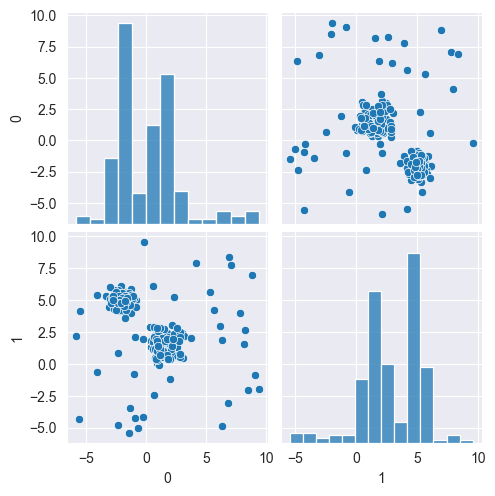

In [17]:
##Pairplot
sns.pairplot(df)


<Axes: ylabel='count'>

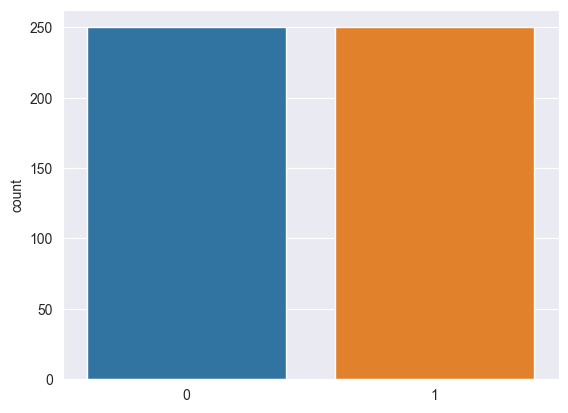

In [19]:
##Countplot

sns.countplot(df)

<Axes: >

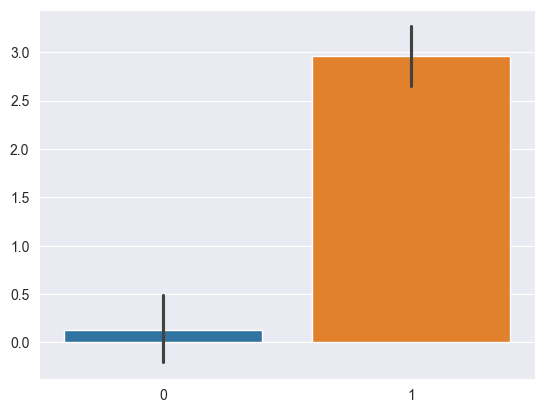

In [20]:
##Barplot
sns.barplot(df)

<Axes: >

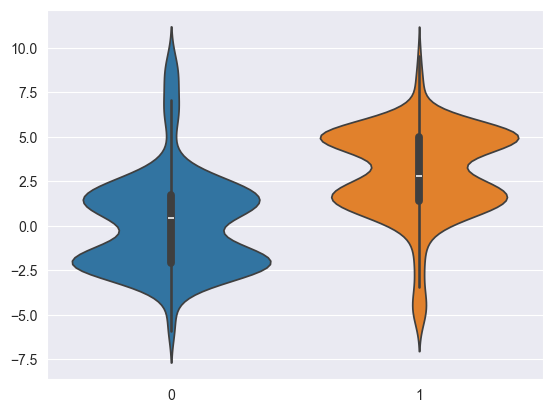

In [21]:
##Violinplot
sns.violinplot(df)

C:\Users\Shadab Khan\AppData\Local\Temp\ipykernel_19296\3609112955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

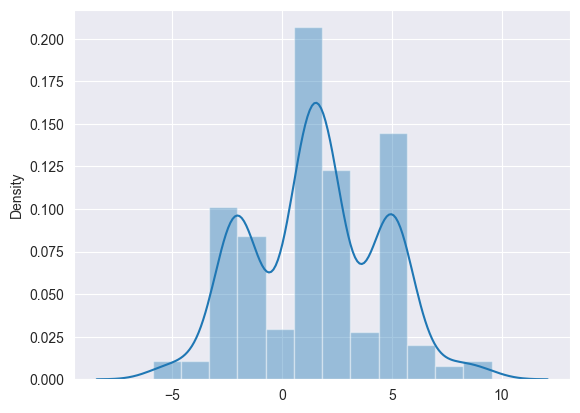

In [22]:
##Distplot
sns.distplot(df)

<Axes: ylabel='Density'>

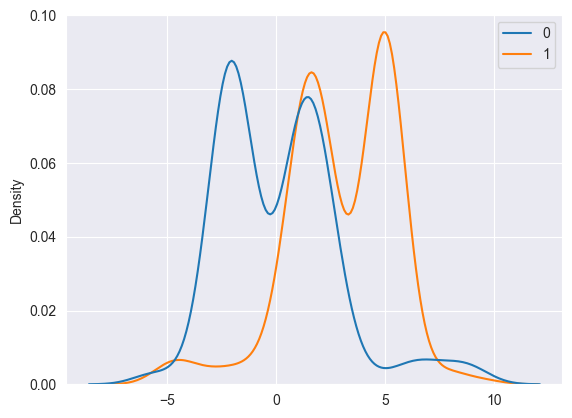

In [23]:
##Kdeplot
sns.kdeplot(df)

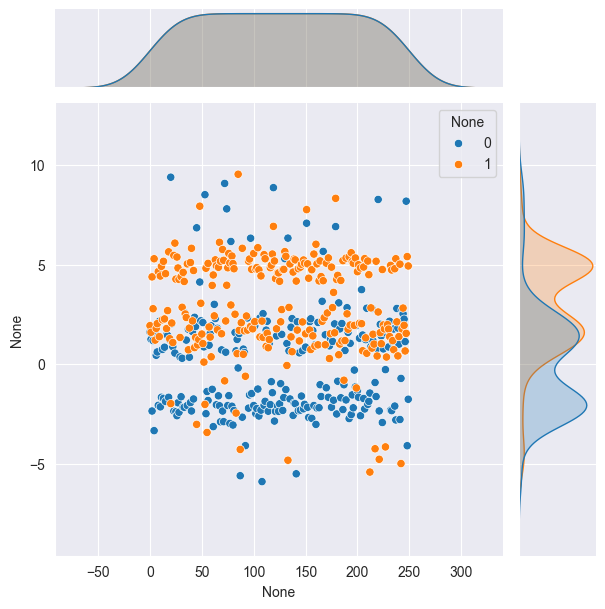

In [24]:
##Jointplot
sns.jointplot(df)

<Axes: >

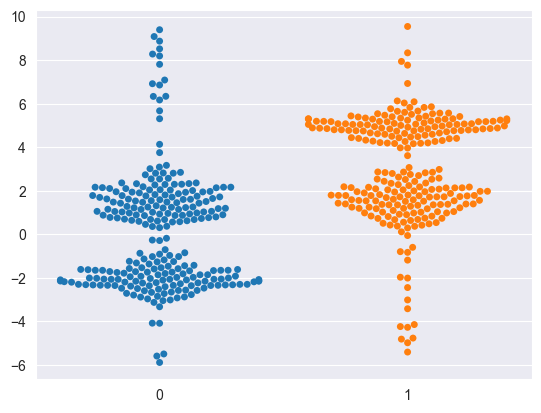

In [25]:
##Swarmplot
sns.swarmplot(df)

<Axes: >

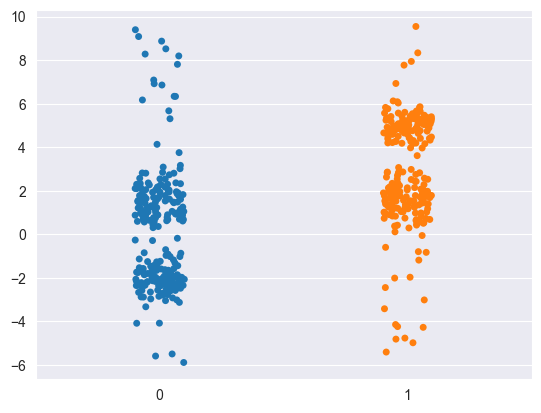

In [26]:
##Stripplot

sns.stripplot(df)

<Axes: >

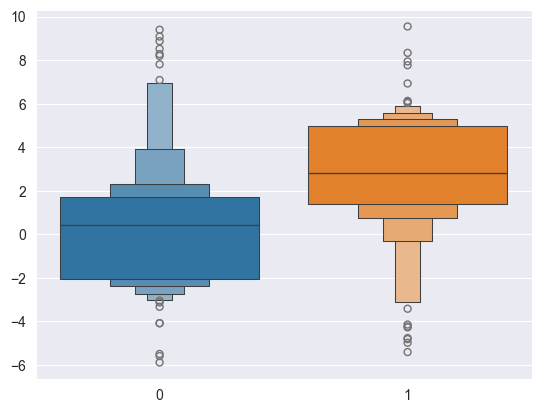

In [27]:
##Boxenplot
sns.boxenplot(df)

<Axes: >

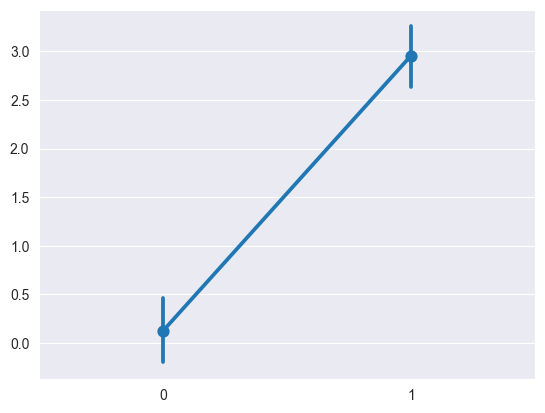

In [28]:
##Pointplot
sns.pointplot(df)

In [39]:
## Applying isolation forest for outlier detection

from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination= .2) #can also use auto
clf.fit(df)
pred = clf.predict(df)



In [40]:
pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [41]:
## making index for the outliers or anomalies

index  = np.where(pred <0)
index


(array([  4,  20,  24,  31,  45,  48,  49,  52,  53,  55,  61,  63,  67,
         72,  74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119,
        126, 130, 132, 133, 141, 151, 160, 166, 167, 177, 179, 182, 187,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248], dtype=int64),)

In [42]:
X= df.values

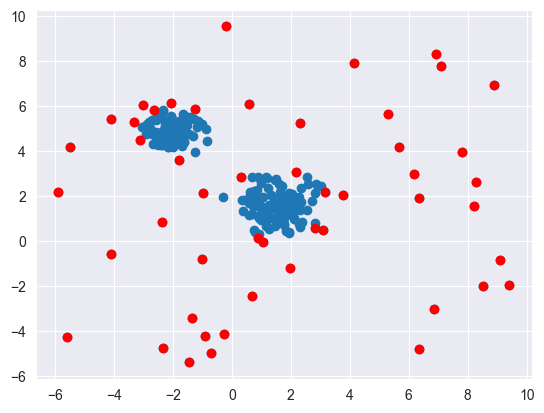

In [44]:
## plt scatter plot for the outliers
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(X[index,0],X[index,1],color='red')

In [45]:
##applying PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=1)#convert the data into 1 dimension
pca.fit(df)

PCA(n_components=1)

In [46]:
##transform the data

X_pca = pca.transform(df)
X_pca

array([[ 1.79675970e+00],
       [ 1.72234327e+00],
       [-2.82825482e+00],
       [ 9.38865970e-01],
       [-4.16603041e+00],
       [ 2.25317215e+00],
       [ 9.71873509e-01],
       [ 9.55835591e-01],
       [-2.77064277e+00],
       [ 2.56843704e+00],
       [-2.69028220e+00],
       [-2.61393489e+00],
       [ 9.35399011e-01],
       [-2.81716286e+00],
       [ 9.94888037e-01],
       [-2.55130224e+00],
       [ 1.77963448e+00],
       [ 1.19929196e+00],
       [-3.06906371e+00],
       [ 1.90000335e+00],
       [ 1.03291849e+01],
       [ 2.04696166e+00],
       [ 1.75483235e+00],
       [-3.50443465e+00],
       [-1.59940423e+00],
       [-2.78873385e+00],
       [-3.63112085e+00],
       [-2.78067070e+00],
       [-2.79914196e+00],
       [ 1.18792849e+00],
       [-2.27351128e+00],
       [ 1.97151768e-01],
       [-2.81348707e+00],
       [-2.53638460e+00],
       [ 2.18396843e+00],
       [ 1.22877771e+00],
       [-3.01559041e+00],
       [ 2.66551246e+00],
       [ 8.8

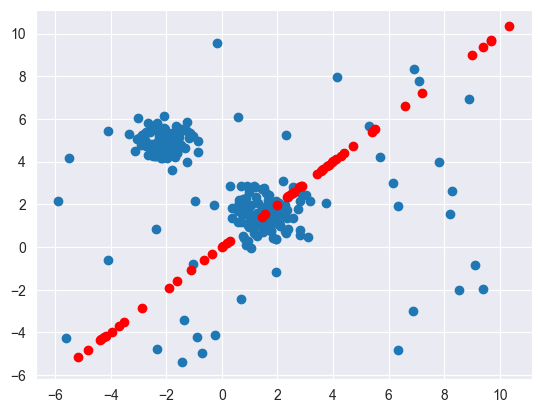

In [54]:
##plot the data after PCA
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(X_pca[index],X_pca[index],color='red') #plot the outliers 


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,df,test_size=0.3,random_state=42)


In [58]:
X_train.shape

(175, 2)

In [59]:
X_test.shape

(75, 2)

In [60]:
from sklearn.cluster import KMeans

In [63]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_ )

In [64]:
wcss

[2397.6122979461,
 1088.0142079193608,
 729.2540085539113,
 456.5568963731837,
 290.30897363571034,
 250.68280167609834,
 235.6657979005268,
 187.5081277191084,
 196.77307129834043,
 149.20600292967686]

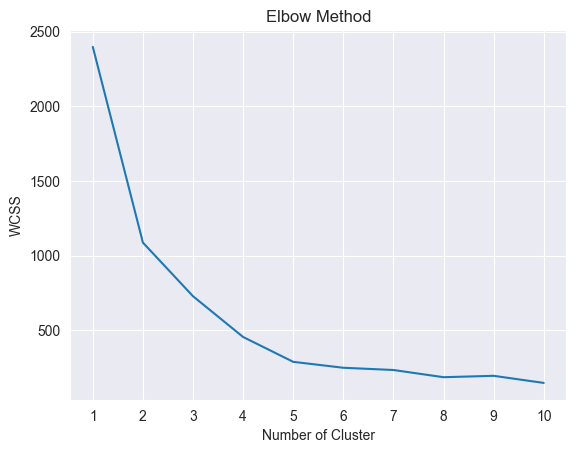

In [66]:
## plotting

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [67]:
## k = 5
kmeans = KMeans(n_clusters=5)

In [68]:
y_labels = kmeans.fit_predict(X_train)

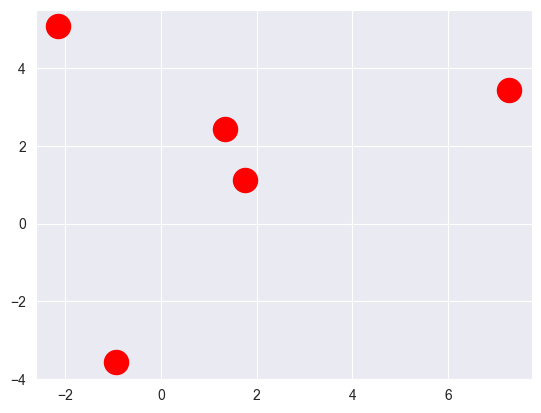

In [71]:
#plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')




In [50]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [51]:
kmeans.cluster_centers_


array([[ 2.02327625,  1.34316523],
       [-2.13603639,  4.8824753 ]])

In [ ]:
kmeans.labels_
